The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four *Corgie* model vehicles were used for the experiment: 
1. Double decker bus 
2. Cheverolet van 
3. Saab 9000 car 
4. Opel Manta 400 car. 

This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.


compactness -	(average perimeter)**2/area 

circularity - 	(average radius)**2/area 

distance_circularity	area/(av.distance from border)**2 

radius_ratio	(max.rad-min.rad)/av.radius 

pr.axis_aspect_ratio	(minor axis)/(major axis) 

max.length_aspect_ratio	(length perp. max length)/(max length) 

scatter_ratio	(inertia about minor axis)/(inertia about major axis) 

elongatedness	area/(shrink width)**2 

pr.axis_rectangularity	area/(pr.axis length*pr.axis width) 

max.length_rectangularity area/(max.length*length perp. to this) 

scaled_variance (2nd order moment about minor axis)/area
 

scaled_variance.1 (2nd order moment about major axis)/area


scaled_radius_of_gyration	(major axis var+minor axis var)/area 

skewness_about (3rd order moment about major axis)/sigma_min**3 
 

skewness_about.1 (3rd order moment about minor axis)/sigma_maj**3 

skewness_about.2 (3rd order moment about minor axis)/sigma_maj**3 
 
hollows_ratio	(area of hollows)/(area of bounding polygon) 

Where sigma_maj**2 is the variance along the major axis and sigma_min**2 is the variance along the minor axis, and 

area of hollows= area of bounding poly-area of object 

The area of the bounding polygon is found as a side result of the computation to find the maximum length. Each individual length computation yields a pair of calipers to the object orientated at every 5 degrees. The object is propagated into an image containing the union of these calipers to obtain an image of the bounding polygon. 

class - Has four unique values OPEL, SAAB, BUS, VAN 

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection, metrics, preprocessing
from sklearn.naive_bayes import GaussianNB


vehicle_df = pd.read_csv("vehicle.csv")
print(vehicle_df.head().transpose())

                               0    1    2    3    4
compactness                   95   91  104   93   85
circularity                   48   41   50   41   44
distance_circularity          83   84  106   82   70
radius_ratio                 178  141  209  159  205
pr.axis_aspect_ratio          72   57   66   63  103
max.length_aspect_ratio       10    9   10    9   52
scatter_ratio                162  149  207  144  149
elongatedness                 42   45   32   46   45
pr.axis_rectangularity        20   19   23   19   19
max.length_rectangularity    159  143  158  143  144
scaled_variance              176  170  223  160  241
scaled_variance.1            379  330  635  309  325
scaled_radius_of_gyration    184  158  220  127  188
scaled_radius_of_gyration.1   70   72   73   63  127
skewness_about                 6    9   14    6    9
skewness_about.1              16   14    9   10   11
skewness_about.2             187  189  188  199  180
hollows_ratio                197  199  196  20

In [249]:
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [250]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

Our dataset has numerical values in all the columns except class. Class being the target column, we will drop it after converting it into category type and store it as a target array which we can use later while we build our models to test the accuracy of prediction. 

Also as we can see from the dataset description above, there are a some missing values in the dataset. We will impute these values with the median value of the respective columns.  


In [251]:
vehicle_df['class'] = vehicle_df['class'].astype('category') 
class_outcome = vehicle_df['class']

vehicle_impute_df = vehicle_df.copy()
#vehicle_impute_df.drop(labels='class', axis = 1, inplace=True)

for col in vehicle_impute_df.columns:
    if(col != "class"):
        col_med = vehicle_impute_df.loc[:,col].median()
        vehicle_impute_df[col].fillna(col_med,inplace=True)

    
    

In [252]:
vehicle_impute_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

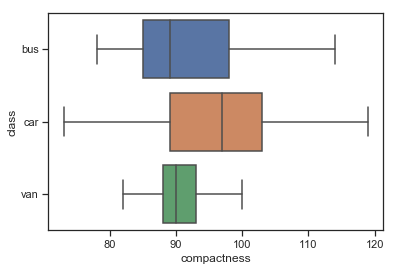

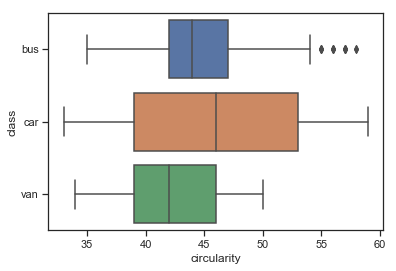

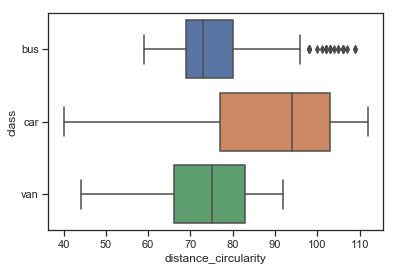

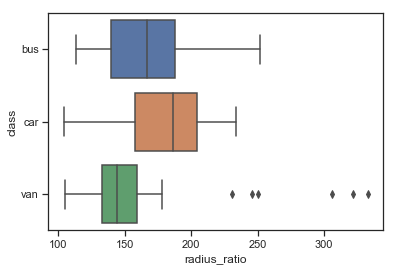

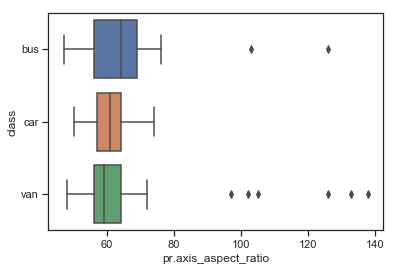

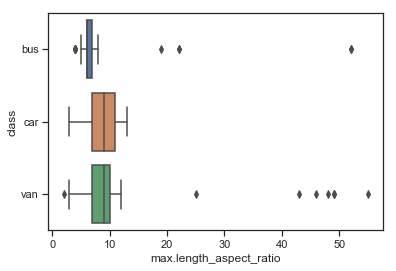

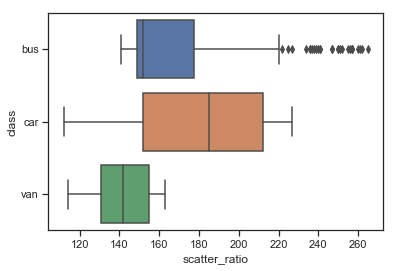

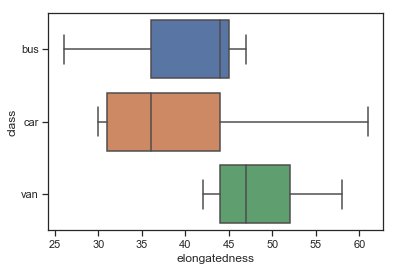

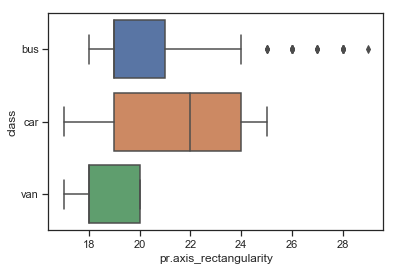

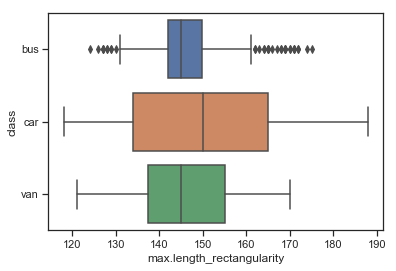

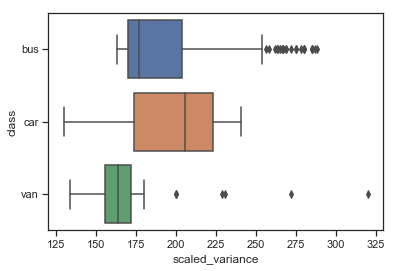

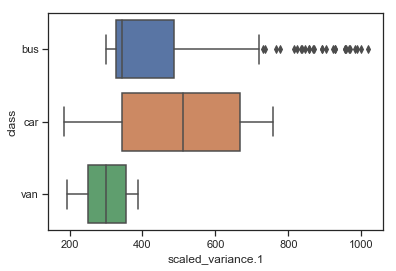

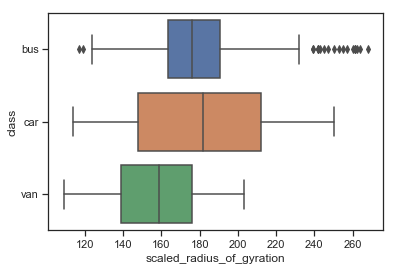

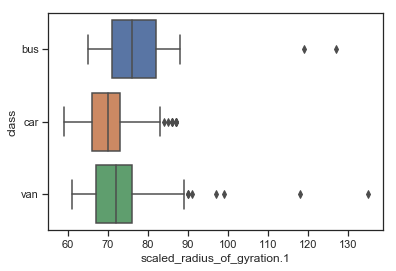

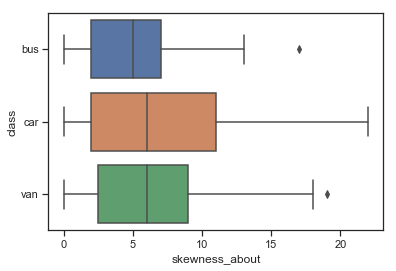

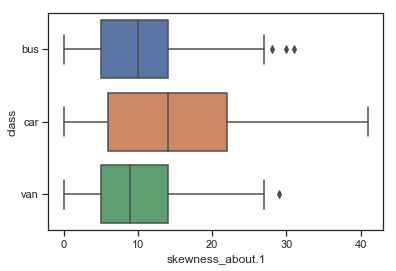

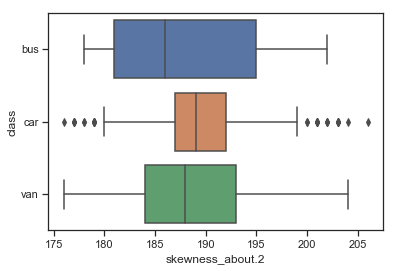

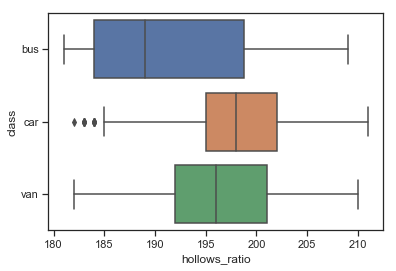

In [253]:
sns.set(style="ticks")
for col in vehicle_impute_df.columns:
    if(col != "class"):
        sns.boxplot(x=col, y="class",data=vehicle_impute_df)
        plt.show()


As we can observe from the box plots above the following features seem to have outliers. 
1. radius_ratio
2. pr.axis_aspect_ratio
3. max.length_aspect_ratio
4. scaled_variance
5. scaled_variance1
6. scaled_radius_of_gyration.1
7. skweness_about
8. skweness_about.1 


We will apply MinMaxScaler transformation on the dataset to treat the outliers. 

In [254]:
from sklearn.preprocessing import MinMaxScaler
vehicle_impute_df.drop(labels='class', axis = 1, inplace=True)

scaler = MinMaxScaler()
scaler.fit(vehicle_impute_df)
MinMaxScaler(copy=True, feature_range=(0, 1))

transformedArr = scaler.transform(vehicle_impute_df)

transform_df = pd.DataFrame(transformedArr)
transform_df['class'] = vehicle_df['class']
transform_df.columns = vehicle_df.columns

transform_df.describe().transpose()

/Users/lavanyas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


count      mean       std  min       25%  \
compactness                  846.0  0.449532  0.179010  0.0  0.304348   
circularity                  846.0  0.454765  0.235934  0.0  0.269231   
distance_circularity         846.0  0.584729  0.218633  0.0  0.416667   
radius_ratio                 846.0  0.283296  0.145857  0.0  0.161572   
pr.axis_aspect_ratio         846.0  0.161289  0.086617  0.0  0.109890   
max.length_aspect_ratio      846.0  0.123913  0.086815  0.0  0.094340   
scatter_ratio                846.0  0.371815  0.216978  0.0  0.228758   
elongatedness                846.0  0.426748  0.223197  0.0  0.200000   
pr.axis_rectangularity       846.0  0.298365  0.215713  0.0  0.166667   
max.length_rectangularity    846.0  0.428555  0.207366  0.0  0.271429   
scaled_variance              846.0  0.308405  0.165055  0.0  0.194737   
scaled_variance.1            846.0  0.306132  0.211626  0.0  0.160971   
scaled_radius_of_gyration    846.0  0.413251  0.204694  0.0  0.251572   
scaled_radius_of_gyration.1  846.0  0.176885  0.098273  0.0  0.105263   
skewness_about               846.0  0.289168  0.222875  0.0  0.090909   
skewness_about.1             846.0  0.307329  0.217828  0.0  0.121951   
skewness_about.2             846.0  0.430615  0.205075  0.0  0.266667   
hollows_ratio                846.0  0.487746  0.247960  0.0  0.308333   

                                  50%       75%  max  
compactness                  0.434783  0.586957  1.0  
circularity                  0.423077  0.615385  1.0  
distance_circularity         0.555556  0.805556  1.0  
radius_ratio                 0.275109  0.397380  1.0  
pr.axis_aspect_ratio         0.153846  0.197802  1.0  
max.length_aspect_ratio      0.113208  0.150943  1.0  
scatter_ratio                0.294118  0.562092  1.0  
elongatedness                0.485714  0.571429  1.0  
pr.axis_rectangularity       0.250000  0.500000  1.0  
max.length_rectangularity    0.400000  0.585714  1.0  
scaled_variance              0.257895  0.457895  1.0  
scaled_variance.1            0.215228  0.482914  1.0  
scaled_radius_of_gyration    0.405660  0.559748  1.0  
scaled_radius_of_gyration.1  0.164474  0.210526  1.0  
skewness_about               0.272727  0.409091  1.0  
skewness_about.1             0.268293  0.463415  1.0  
skewness_about.2             0.400000  0.566667  1.0  
hollows_ratio                0.533333  0.666667  1.0

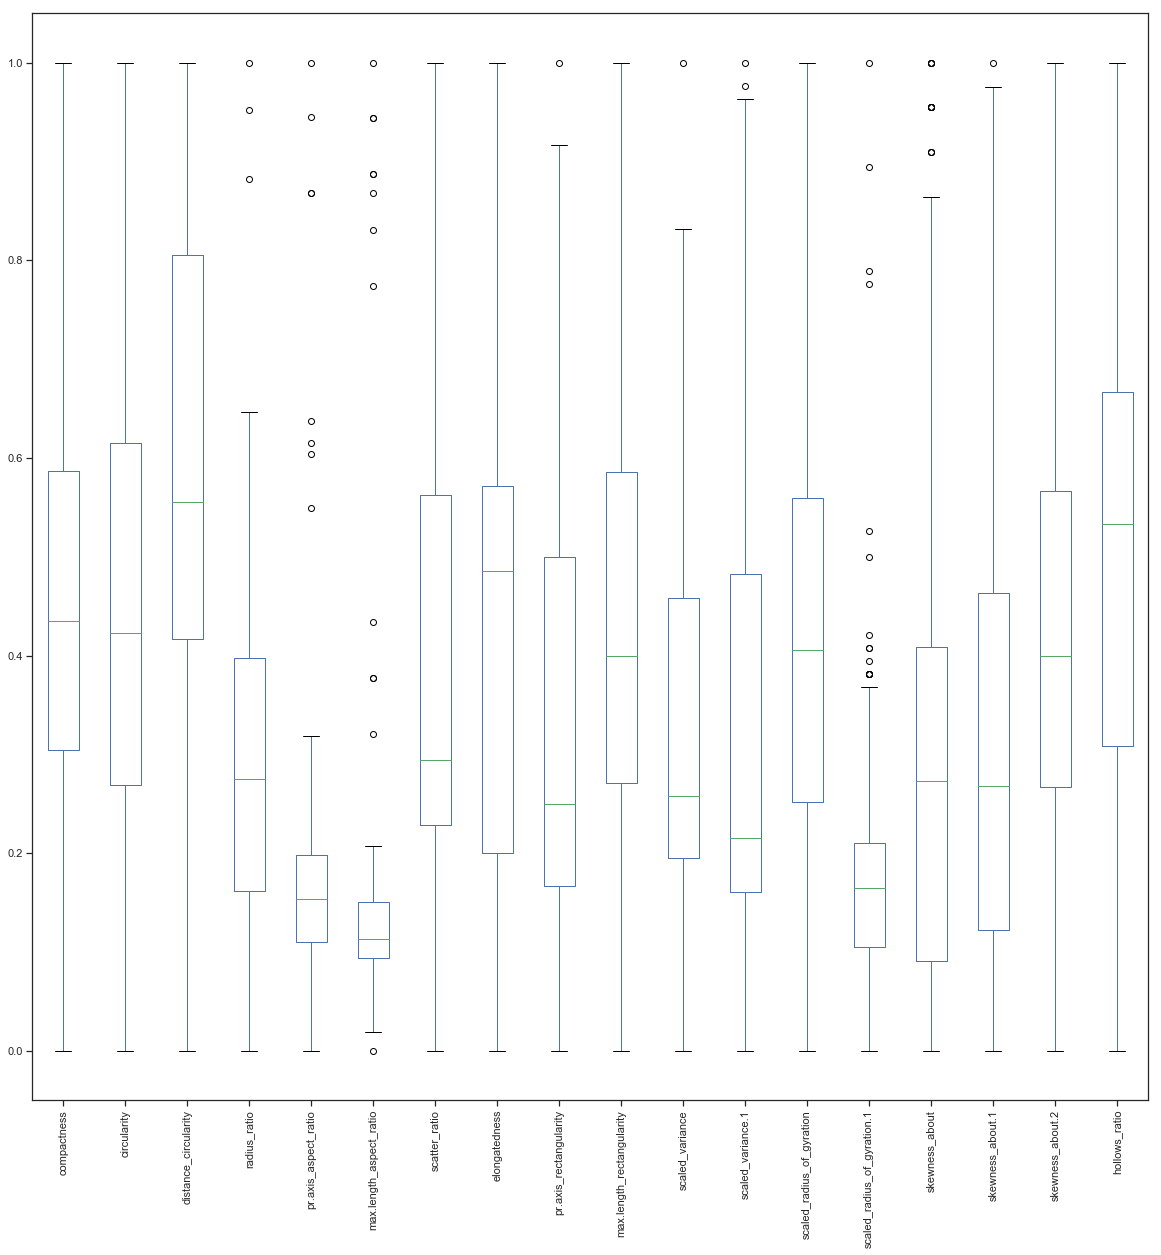

In [255]:

transform_df.boxplot(rot=90,figsize=[20,20],grid=False)

    

There are still some outliers in the columns even after the MinMaxScaling. Instead of removing the outliers, these outliers will be imputed with the median values of the respective columns. 

Outliers in Column  compactness
[]
Outliers in Column  circularity
[]
Outliers in Column  distance_circularity
[]
Outliers in Column  radius_ratio
[0.8820960698689957, 0.9519650655021834, 1.0]
Outliers in Column  pr.axis_aspect_ratio
[0.6153846153846155, 0.8681318681318683, 0.8681318681318683, 0.9450549450549451, 0.6043956043956044, 1.0, 0.5494505494505494, 0.6373626373626374]
Outliers in Column  max.length_aspect_ratio
[0.9433962264150944, 0.8867924528301887, 0.9433962264150944, 0.3773584905660377, 0.8679245283018868, 0.7735849056603773, 0.8867924528301887, 0.4339622641509434, 0.830188679245283, 0.32075471698113206, 0.0, 1.0, 0.3773584905660377]
Outliers in Column  scatter_ratio
[]
Outliers in Column  elongatedness
[]
Outliers in Column  pr.axis_rectangularity
[1.0]
Outliers in Column  max.length_rectangularity
[]
Outliers in Column  scaled_variance
[0.9999999999999999]
Outliers in Column  scaled_variance.1
[0.9760191846522781, 1.0]
Outliers in Column  scaled_radius_of_gyration
[]
Out

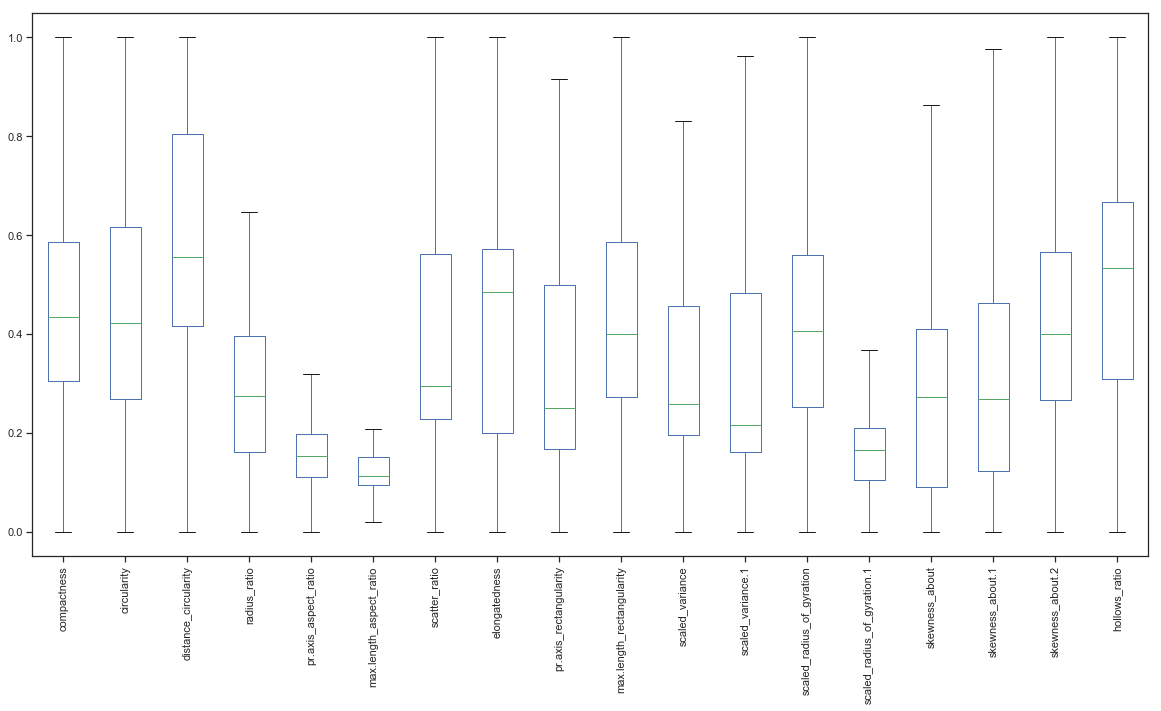

In [256]:
for col in transform_df.columns:
    if(col != "class"):
        q1, median, q3= np.percentile(transform_df[col],[25,50,75])
        iqr = q3-q1
        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr) 
        print("Outliers in Column ",col)
        outliers=[]
        for val in transform_df[col]:
            if val < lower_bound or val>upper_bound:
                outliers.append(val)
        print(outliers)
        transform_df.loc[(transform_df[col] > upper_bound) | (transform_df[col] < lower_bound),col] = median


#Box plot the dataframe after outlier treatment.
transform_df.plot(kind='box', figsize=(20,10),legend=True, rot=90)
    
    



In [257]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1E10, class_weight='balanced')

transform_df.drop(labels='class', axis = 1, inplace=True)

X = np.array(transform_df)
y = np.array(class_outcome)

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=1)

clf.fit(X_train,y_train)


clf.score(X_test, y_test)
test_prediction = clf.predict(X_test)
print("Model Accuracy with test data : ",metrics.accuracy_score(y_test, test_prediction))

print("Confusion Matrix")

confusion_matrix = metrics.confusion_matrix(y_test, test_prediction, labels=class_outcome.unique())

print(confusion_matrix)



Model Accuracy with test data :  0.9291338582677166
Confusion Matrix
[[ 55   5   2]
 [  3 122   8]
 [  0   0  59]]


`transform_df` is the dataset which is scaled and outliers treated. We will now analyze this dataset with SupportVectorMachine and GaussianNaiveBayes to see which model can give us more accurate prediction in the production environment.

In [258]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', C=1E10, class_weight='balanced')

X = np.array(transform_df)
y = np.array(class_outcome)

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=1)

clf.fit(X_train,y_train)


clf.score(X_test, y_test)
test_prediction = clf.predict(X_test)
print("Model Accuracy with test data : ",metrics.accuracy_score(y_test, test_prediction))

print("Confusion Matrix")

confusion_matrix = metrics.confusion_matrix(y_test, test_prediction, labels=class_outcome.unique())

print(confusion_matrix)



Model Accuracy with test data :  0.9291338582677166
Confusion Matrix
[[ 55   5   2]
 [  3 122   8]
 [  0   0  59]]


In [259]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

X = np.array(transform_df)
y = np.array(class_outcome)

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=1)

clf.fit(X_train,y_train)


clf.score(X_test, y_test)
test_prediction = clf.predict(X_test)
print("Model Accuracy with test data : ",metrics.accuracy_score(y_test, test_prediction))

print("Confusion Matrix")

confusion_matrix = metrics.confusion_matrix(y_test, test_prediction, labels=class_outcome.unique())

print(confusion_matrix)


Model Accuracy with test data :  0.6377952755905512
Confusion Matrix
[[55  6  1]
 [45 84  4]
 [29  7 23]]


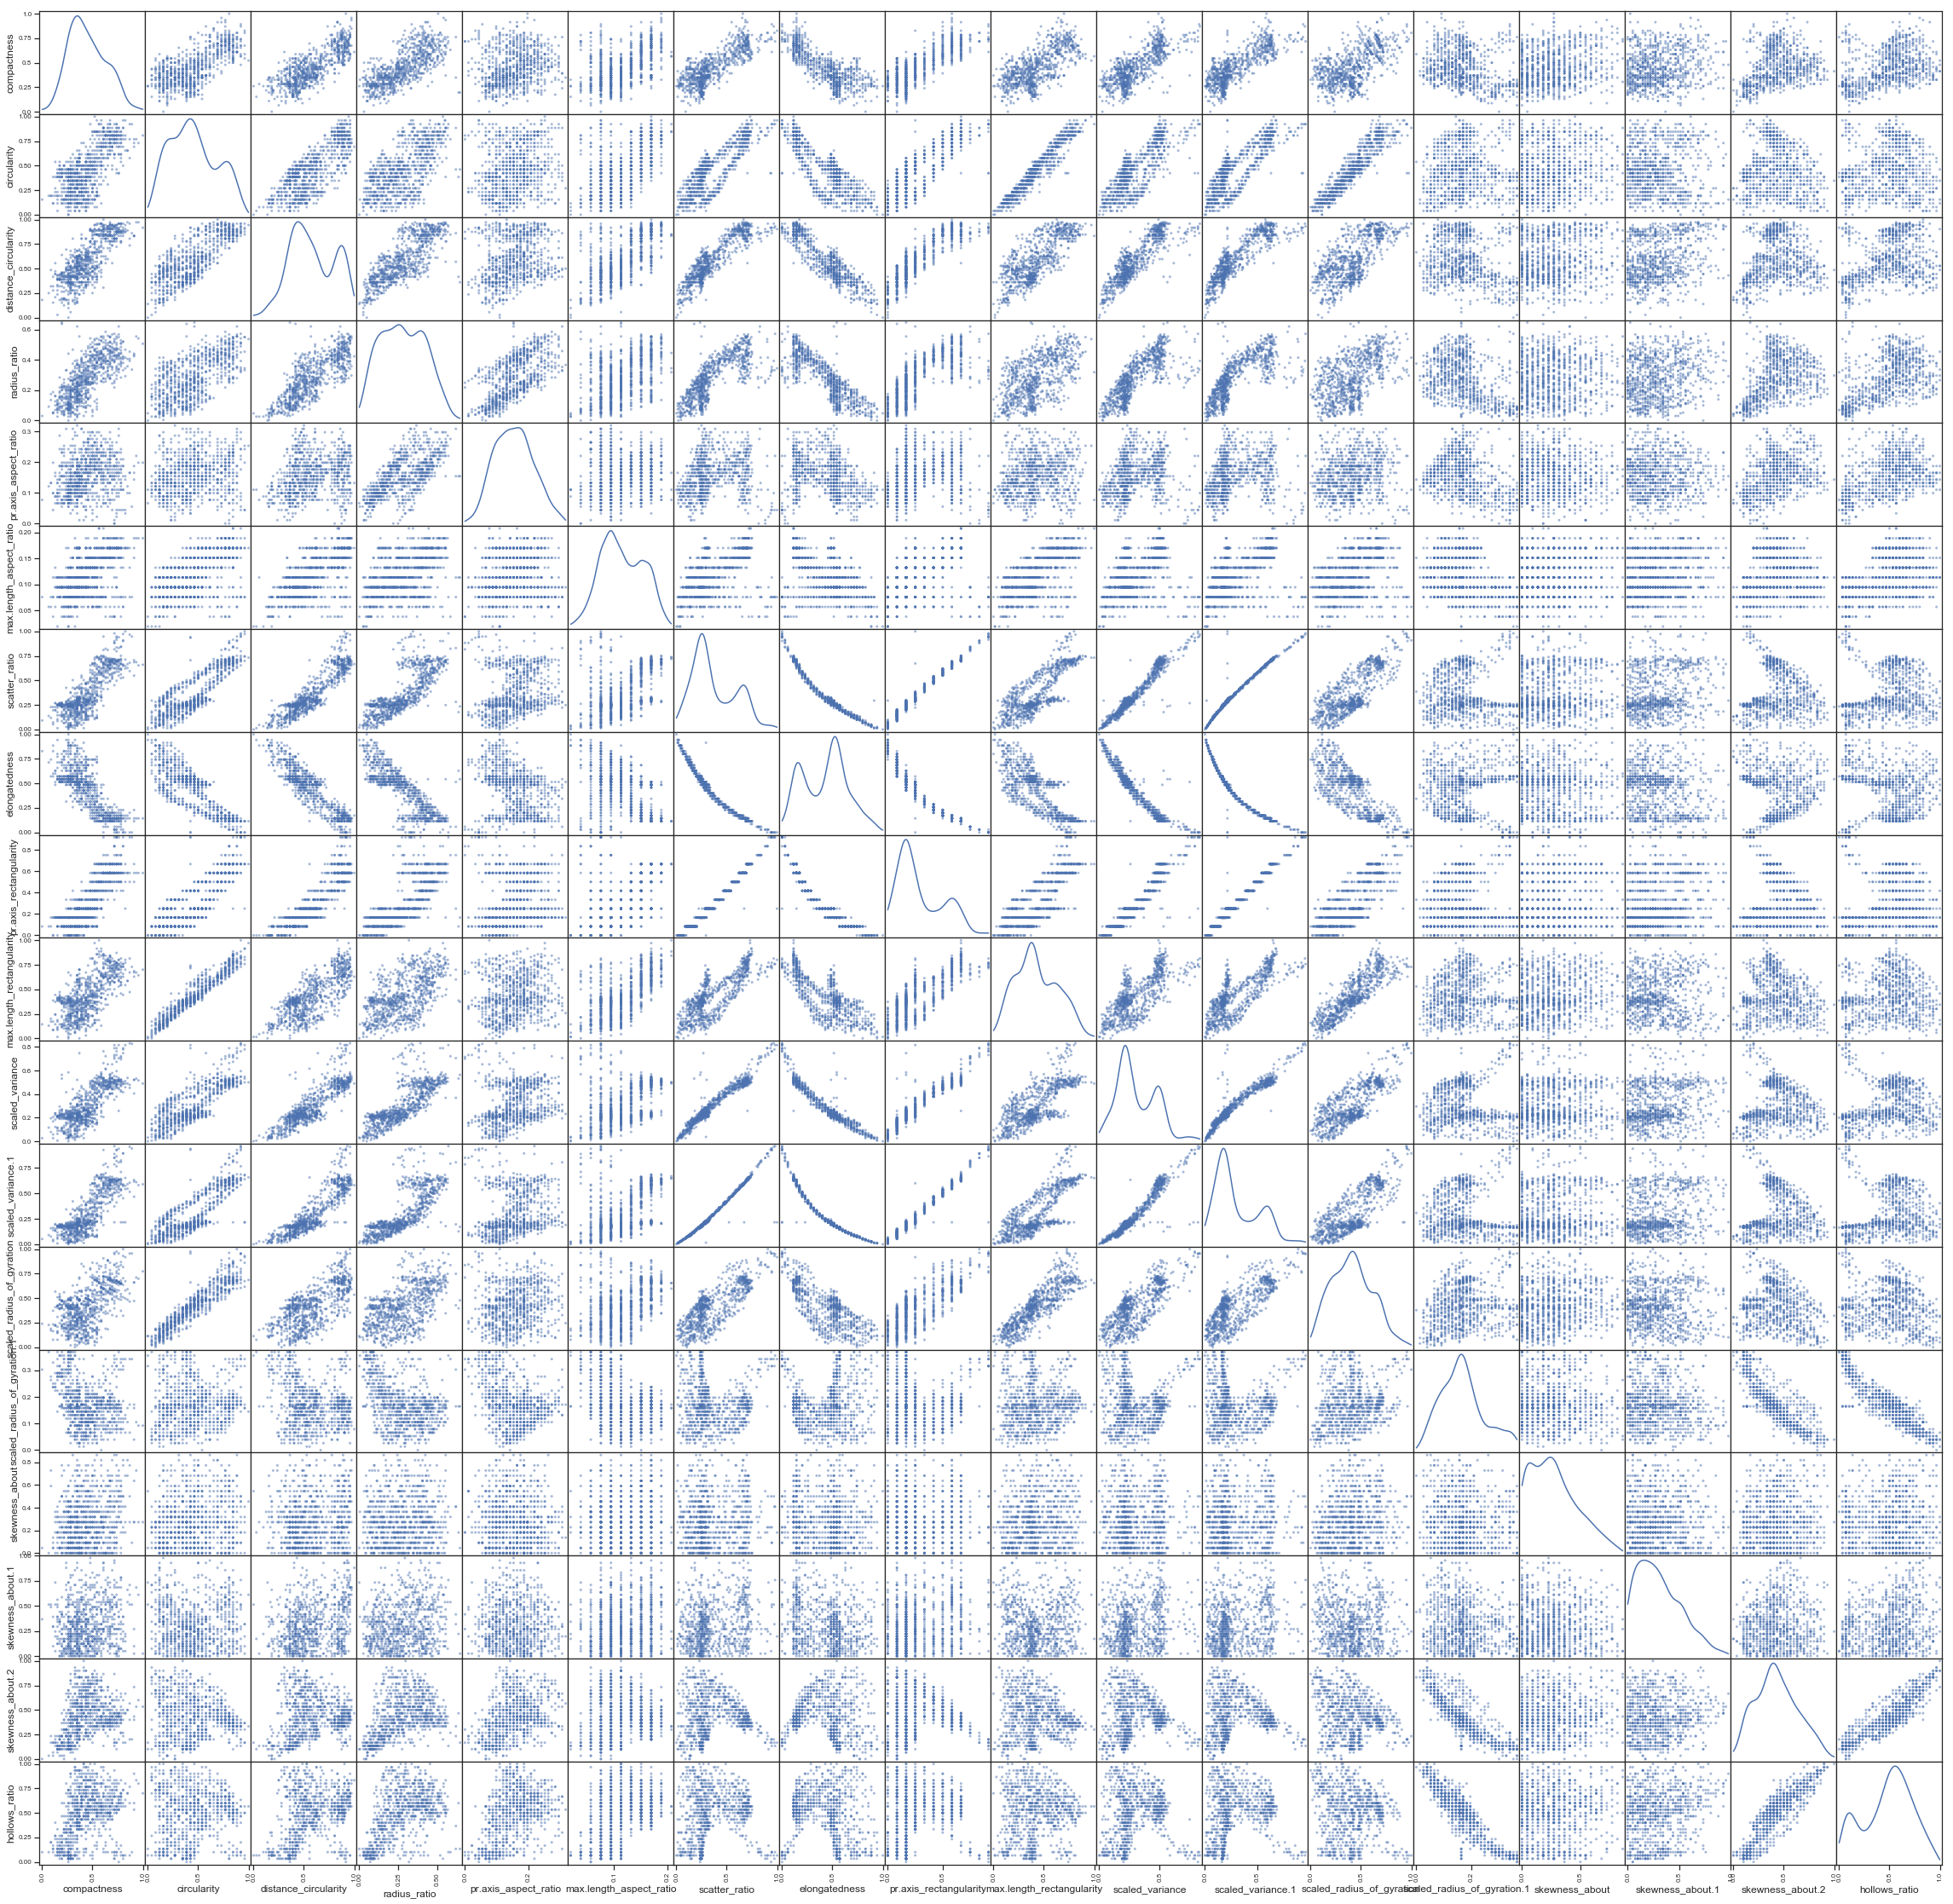

In [265]:
from pandas.plotting import scatter_matrix
spd = scatter_matrix(transform_df, figsize = (40,40), diagonal='kde')

As we can see above, the Gaussian NaiveBayes model has low prediction of only 63.78% whereas SVM has an accuracy of 92%. The scatter plot shows us the correlation between features. When the scatter plot is more like a cloud, it implies no correlation between the features. Since it is evident from the scatter plot many features are positively or negatively correlated, we should be able to combine the features to predict the result. Let's analyze and see if the results are more accurate and less of an overfit in the production environment by doing a PCA before the SVM and Gaussian NB classification. Plotting the cumulative sum of the explained variance ratio will help us assess the number of components we should pass as hyperparameter to the PCA.

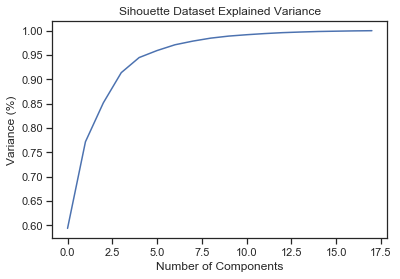

In [266]:
from sklearn.decomposition import PCA

pca = PCA().fit(transform_df)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Sihouette Dataset Explained Variance')
plt.show()

From the plot above it is evident that is we have 8 components, we will have almost 98% of information persisted and only 2% lost. We will do PCA with 8 components.

In [ ]:
pca = PCA(n_components=8)
pca.fit(transform_df)
pca_transformed_df = pca.transform(transform_df)
spd = scatter_matrix(pca_transformed_df, figsize = (40,40), diagonal='kde')

In [ ]:
clf = SVC(kernel='linear', C=1E10, class_weight='balanced')

X = np.array(pca_transformed_df)
y = np.array(class_outcome)

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=1)

clf.fit(X_train,y_train)


clf.score(X_test, y_test)
test_prediction = clf.predict(X_test)
print("Model Accuracy with test data : ",metrics.accuracy_score(y_test, test_prediction))

print("Confusion Matrix")

confusion_matrix = metrics.confusion_matrix(y_test, test_prediction, labels=class_outcome.unique())

print(confusion_matrix)


Model Accuracy with test data :  0.8582677165354331
Confusion Matrix
[[ 56   4   2]
 [  9 107  17]
 [  1   3  55]]


In [ ]:
clf = GaussianNB()

X = np.array(pca_transformed_df)
y = np.array(class_outcome)

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=1)

clf.fit(X_train,y_train)


clf.score(X_test, y_test)
test_prediction = clf.predict(X_test)
print("Model Accuracy with test data : ",metrics.accuracy_score(y_test, test_prediction))

print("Confusion Matrix")

confusion_matrix = metrics.confusion_matrix(y_test, test_prediction, labels=class_outcome.unique())

print(confusion_matrix)
